<a href="https://colab.research.google.com/github/mabdulghofur142/Data-Mining/blob/main/Study%20Case%202/2024_Kelompok_A_Data_Mining_Study_Case_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Case Data Mining 02 : Clustering

**Kelompok 2A**

| NIM | Nama |
|--------- | --------- |
|11220940000001 | Baharuddin Saefullah Asyubanji |
|11220940000020 | Muhammad Abdul Ghofur |
|11220940000022 | Anjini Eva Nurhayati |
|11220940000029 | Muhammad Anthar Jailani Putra |
|11220940000063 | Awalia Damayanti |

# Import Data dan Modul

Import data pelanggan MixITup Ice Cream yang berisi informasi pelanggan, seperti :     

1. ID : ID customer yang ditentukan melalui incremental value berdasarkan urutan kapan pelanggan tersebut mendaftar loyality program.

2. Jenis Kelamin : Pria / Wanita.
3. Umur : Usia pelanggan (dalam tahun).
4. Pendapatan per-bulan : Pendapatan pelanggan dalam sebulan (dalam Rupiah).
5. Skor Pengeluaran : Skor yang diberikan oleh MixITup untuk mengukur seberapa besar pengeluaran pelanggan di MixITup, dengan rentang nilai antara 0 hingga 100.
6. Menikah: Status pernikahan pelanggan, dengan kode 0 untuk "Belum Menikah" dan 1 untuk "Menikah."
7. Kota: Lokasi di mana pelanggan mendaftarkan diri untuk program loyalitas MixITup.
8. Promo: Seberapa sering pelanggan menggunakan promo yang ditawarkan, dengan kategori sebagai berikut:
    - 0: Tidak Pernah
    - 1: Jarang
    - 2: Sedang
    - 3: Sering
9. HariFav: Hari paling sering pelanggan menggunakan kartu loyalitasnya.
10. FavFlavor: Rasa es krim yang paling sering dipilih oleh pelanggan, dengan beberapa opsi sebagai berikut:
    - 0: Vanilla
    - 1: Strawberry
    - 2: Cokelat
    - 3: Blueberry
    - 4: BubbleGum/Cotton Candy
    - 5: Coconut
    - 6: Caramel Pecan
    - 7: Mix 2 Flavors
    - 8: Mix 3 Flavors

Dataset ini memberikan gambaran tentang kebiasaan dan preferensi pelanggan MixITup Ice Cream, yang dapat digunakan untuk menganalisis perilaku konsumen, segmentasi pelanggan, dan mengoptimalkan strategi pemasaran.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
url = 'https://raw.githubusercontent.com/mabdulghofur142/Data-Mining/main/Case-Study-02-MixITup.csv'
df = pd.read_csv(url, sep=';')
print(df.head())

    ID Jenis Kelamin Umur Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0  101        Wanita   49         Rp13.114.754                52       1   
1  102        Wanita   32         Rp33.606.557                86       1   
2  103          Pria   51         Rp15.983.606                41       1   
3  104          Pria   19         Rp12.704.918                55       0   
4  105        Wanita   38         Rp20.081.967                42       1   

      Kota  Promo HariFav  FavFlavor  
0  Jakarta    1.0   Sabtu          2  
1    Depok    1.0  Minggu          6  
2  Jakarta    2.0  Minggu          3  
3  Jakarta    1.0    Rabu          7  
4  Jakarta    2.0   Senin          8  


In [ ]:
!pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import pickle

In [ ]:
import warnings; warnings.simplefilter('ignore')

# Pre-Processing Data



## Melihat Data

In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,Rp13.114.754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,Rp33.606.557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,Rp15.983.606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,Rp12.704.918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,Rp20.081.967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,Rp4.098.360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,Rp15.983.606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,Rp43.032.786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,Rp1.229.508,94,1,Depok,0.0,Selasa,0


In [ ]:
#cek dimensi data
df.shape

(200, 10)

## Hapus Variabel

In [ ]:
df.columns

Index(['ID', 'Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan',
       'skor-pengeluaran', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

Kolom "ID" dihapus karena tidak memberikan infomarsi yang berguna.

In [ ]:
df = df.drop(columns=['ID'])

In [ ]:
df.columns

Index(['Jenis Kelamin', 'Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran',
       'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor'],
      dtype='object')

## Cek Noise

In [ ]:
#cek noise
unique_counts = df.nunique()
print(unique_counts)

Jenis Kelamin            3
Umur                    45
Pendapatan-per-bulan    64
skor-pengeluaran        85
Menikah                  4
Kota                     4
Promo                    5
HariFav                  7
FavFlavor               10
dtype: int64


In [ ]:
mylist = list(df.columns)
for i in mylist:
  print("\n",i)
  print(df[i].unique())


 Jenis Kelamin
['Wanita' 'Pria' nan '-']

 Umur
['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' "35'"
 '56' '26' '57']

 Pendapatan-per-bulan
['Rp13.114.754' 'Rp33.606.557' 'Rp15.983.606' 'Rp12.704.918'
 'Rp20.081.967' 'Rp29.098.360' 'Rp21.311.475' 'Rp2.049.180' 'Rp13.524.590'
 'Rp19.262.295' 'Rp11.475.409' 'Rp29.508.196' 'Rp34.016.393' 'Rp6.147.540'
 'Rp11.885.245' 'Rp25.819.672' 'Rp25.000.000' 'Rp5.327.868' 'Rp9.836.065'
 'Rp23.770.491' 'Rp22.950.819' 'Rp1.229.508' 'Rp9.016.393' 'Rp9.426.229'
 'Rp29.918.032' 'Rp28.688.524' 'Rp27.049.180' 'Rp18.442.622'
 'Rp19.672.131' 'Rp11.065.573' 'Rp36.065.573' 'Rp20.491.803'
 'Rp17.622.950' 'Rp409.836' 'Rp25.409.836' 'Rp1.639.344' 'Rp5.737.704'
 'Rp34.426.229' 'Rp10.245.901' 'Rp50.000.000' 'Rp14.344.262'
 'Rp35.245.901' 'Rp7.377.049' 'Rp45.491.803' 'Rp40.163.934' 'Rp17.213.114'
 'Rp23.360.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         196 non-null    object 
 1   Umur                  200 non-null    object 
 2   Pendapatan-per-bulan  200 non-null    object 
 3   skor-pengeluaran      200 non-null    int64  
 4   Menikah               188 non-null    object 
 5   Kota                  200 non-null    object 
 6   Promo                 194 non-null    float64
 7   HariFav               200 non-null    object 
 8   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 14.2+ KB


In [ ]:
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')
df['Umur'] = df['Umur'].replace("35'", 35)
df['Promo'] = df['Promo'].replace(5, 3)
df['FavFlavor'] = df['FavFlavor'].replace(9, 8)

In [ ]:
df[(df['Menikah'] == " ") | (df['Menikah'] == "-")] # kita jadikan seragam ntah itu sebagai nan atau lainnya, karena bisa saja duda atau janda

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
151,Pria,30,Rp34.426.229,97,,Depok,NaN,Sabtu,0
180,Pria,50,Rp28.688.524,26,-,Tangerang,3.0,Minggu,4


In [ ]:
#di seragamin jadi nan dlu, nanti baru di sesuaikan dengan nan lainnya
df["Menikah"].replace(" ", np.nan, inplace=True)
df["Menikah"].replace("-", np.nan, inplace=True)

In [ ]:
df = df[df['Umur'] != '2']
df = df[df['Jenis Kelamin'] != "-"]
df = df[df['skor-pengeluaran'] != 101]
df = df[df["HariFav"] != "9"]

## Mengoreksi Tipe Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         193 non-null    object 
 1   Umur                  197 non-null    object 
 2   Pendapatan-per-bulan  197 non-null    object 
 3   skor-pengeluaran      197 non-null    int64  
 4   Menikah               184 non-null    object 
 5   Kota                  197 non-null    object 
 6   Promo                 191 non-null    float64
 7   HariFav               197 non-null    object 
 8   FavFlavor             197 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 15.4+ KB


In [ ]:
df['Umur'] = df['Umur'].astype("int64")
df['Kota'] = df['Kota'].astype('category')
df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('Rp', '')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].str.replace('.', '')
df['Pendapatan-per-bulan'] = df['Pendapatan-per-bulan'].astype("int64")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         193 non-null    category
 1   Umur                  197 non-null    int64   
 2   Pendapatan-per-bulan  197 non-null    int64   
 3   skor-pengeluaran      197 non-null    int64   
 4   Menikah               184 non-null    category
 5   Kota                  197 non-null    category
 6   Promo                 191 non-null    category
 7   HariFav               197 non-null    category
 8   FavFlavor             197 non-null    category
dtypes: category(6), int64(3)
memory usage: 8.6 KB


## Cek Duplikasi Data

In [ ]:
df.duplicated().sum()

0

## Outlier

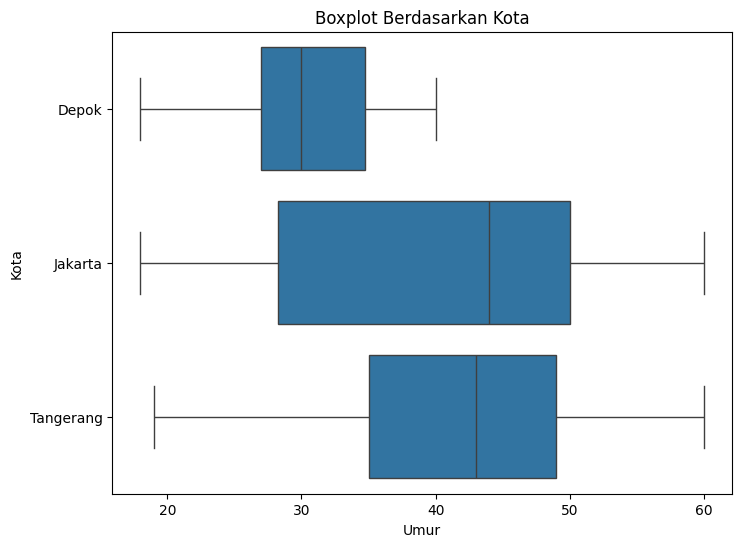

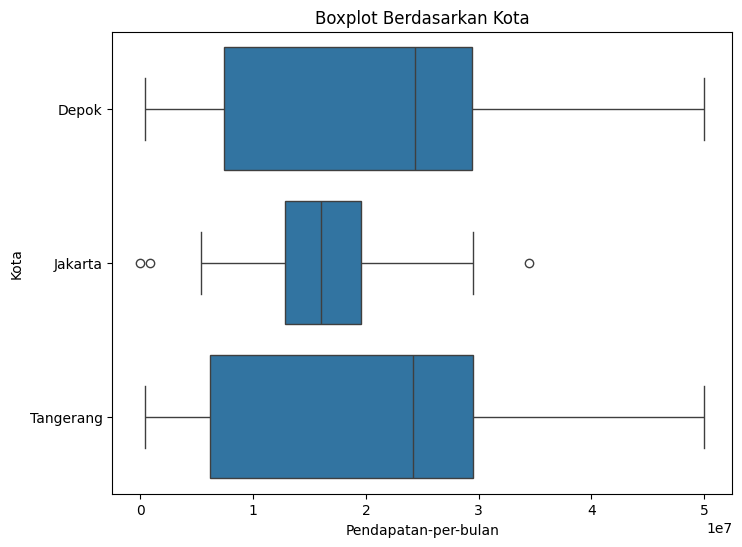

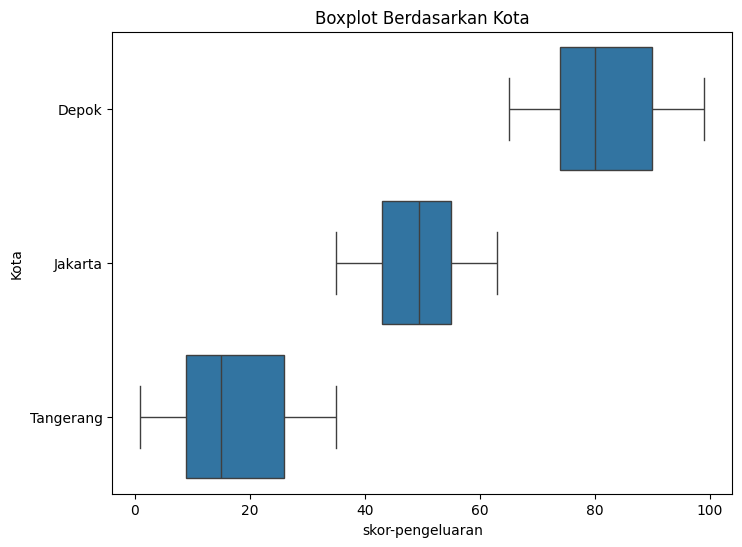

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Boxplot untuk Umur
plt.figure(figsize=(8, 6))
sns.boxplot(x='Umur', y='Kota', data=df)
plt.title('Boxplot Berdasarkan Kota')
plt.show()


# Boxplot untuk Pendapatan-per-bulan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pendapatan-per-bulan', y='Kota', data=df)
plt.title('Boxplot Berdasarkan Kota')
plt.show()

# Boxplot untuk skor-pengeluaran
plt.figure(figsize=(8, 6))
sns.boxplot(x='skor-pengeluaran', y='Kota', data=df)
plt.title('Boxplot Berdasarkan Kota')
plt.show()

## Missing Value

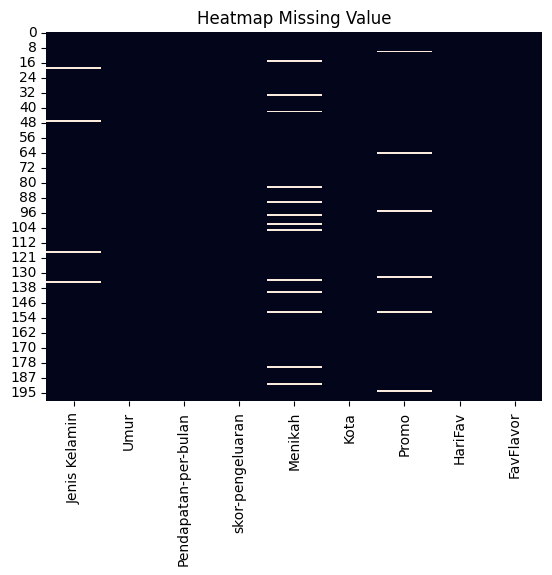

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
#cek missing value
df.isnull().sum()

,0
Jenis Kelamin,4
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,13
Kota,0
Promo,6
HariFav,0
FavFlavor,0


In [ ]:
df[df.isna().any(axis=1)] # menikah bisa diasumsikan pakai rata" usia menikah, promo brdasarkan skor pengeluaran, kelamin bisa kita pisahkan dataframe nya

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
10,Wanita,31,11475409,54,1,Jakarta,NaN,Senin,6
15,Wanita,51,11885245,50,NaN,Jakarta,1.0,Minggu,2
19,NaN,49,9836065,28,1,Tangerang,3.0,Sabtu,7
33,Wanita,38,21311475,40,NaN,Jakarta,2.0,Selasa,7
42,Pria,39,25819672,88,NaN,Depok,1.0,Minggu,0
47,NaN,36,29508196,10,1,Tangerang,3.0,Minggu,6
64,Wanita,31,10245901,42,1,Jakarta,NaN,Minggu,6
82,Wanita,31,27049180,93,NaN,Depok,0.0,Selasa,0
90,Wanita,36,29508196,27,NaN,Tangerang,3.0,Minggu,5
95,Wanita,30,29918032,86,1,Depok,NaN,Minggu,5


In [ ]:
mylist = list(df.columns)
for i in mylist:
  print("\n",i)
  print(df[i].unique())


 Jenis Kelamin
['Wanita', 'Pria', NaN]
Categories (2, object): ['Pria', 'Wanita']

 Umur
[49 32 51 19 38 33 27 24 21 31 36 46 60 58 47 45 22 18 59 44 39 35 20 30
 23 48 37 40 34 41 53 54 28 55 25 50 42 29 43 52 56 26 57]

 Pendapatan-per-bulan
[13114754 33606557 15983606 12704918 20081967 29098360 21311475  2049180
 13524590 19262295 11475409 29508196 34016393  6147540 11885245 25819672
 25000000  5327868  9836065 23770491 22950819  1229508  9016393  9426229
 29918032 28688524 27049180 18442622 19672131 11065573 36065573 20491803
 17622950   409836 25409836  1639344  5737704 34426229 10245901 50000000
 14344262 35245901  7377049 45491803 40163934 17213114 23360655  7786885
 18852459 22131147  3688524  2459016  3278688 24180327 22540983   819672
 13934426 26229508 31967213 24590163 18032786 43032786  4098360        0]

 skor-pengeluaran
[52 86 41 55 42 95 56 77 47 54 92 15  4 50 16 87 32 28 79 59 60  7 75 57
  6 73 69 40  5 89 49 13 88 48 10 36  3 31 39 46 83 68 14 24 65 91 61 90
 58 9

In [ ]:
df["Menikah"].fillna( "1", inplace=True)
df["Promo"].fillna(0.0, inplace=True)

In [ ]:
# Menghapus Missing Value
df= df.dropna()

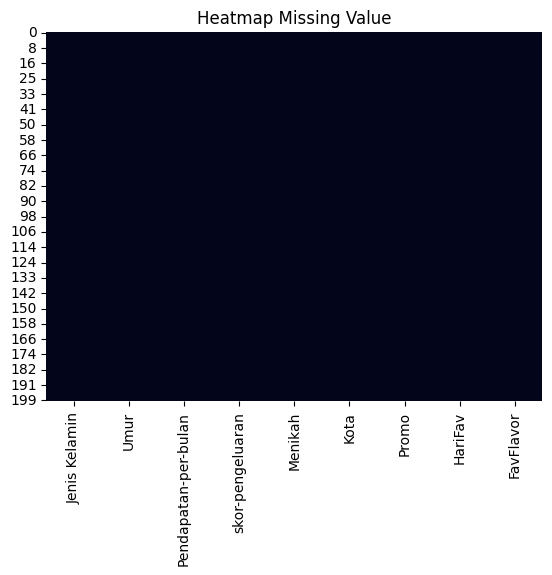

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
 # cek apakah masih terdapat missing value
 df.isnull().sum()

,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


## Statistik Deskriptif

In [ ]:
df.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,193.000000,1.930000e+02,193.000000
mean,37.398964,1.877389e+07,50.481865
std,11.770434,1.082620e+07,25.967145
min,18.000000,0.000000e+00,1.000000
25%,29.000000,1.106557e+07,35.000000
50%,36.000000,1.926230e+07,50.000000
75%,47.000000,2.581967e+07,73.000000
max,60.000000,5.000000e+07,99.000000


In [ ]:
df.describe(include='all')

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
count,193,193.000000,1.930000e+02,193.000000,193,193,193.0,193,193.0
unique,2,NaN,NaN,NaN,2,3,4.0,7,9.0
top,Wanita,NaN,NaN,NaN,1,Jakarta,1.0,Senin,0.0
freq,108,NaN,NaN,NaN,169,84,85.0,65,38.0
mean,NaN,37.398964,1.877389e+07,50.481865,NaN,NaN,NaN,NaN,NaN
std,NaN,11.770434,1.082620e+07,25.967145,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,29.000000,1.106557e+07,35.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,36.000000,1.926230e+07,50.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,47.000000,2.581967e+07,73.000000,NaN,NaN,NaN,NaN,NaN


# Visualisasi

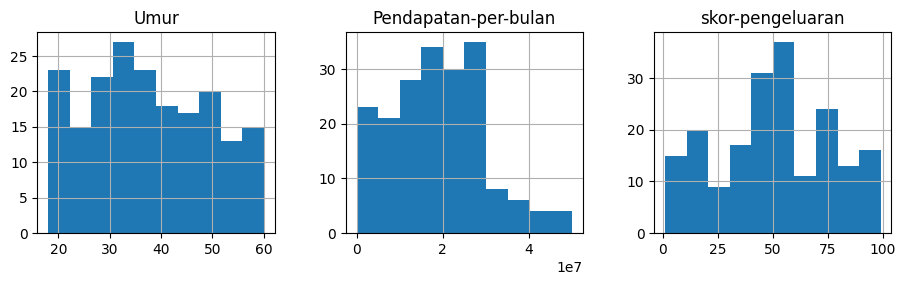

In [ ]:
numerical = df.select_dtypes(include = ['int',]).columns
df[numerical].hist(figsize=(15, 6), layout=(2, 4));

<Axes: xlabel='Menikah', ylabel='count'>

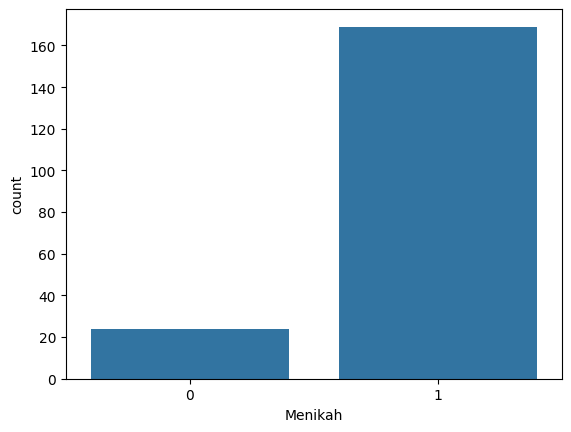

In [ ]:
import seaborn as sns # This line may already be in your code, but include it to be sure
import matplotlib.pyplot as plt # Import matplotlib.pyplot and alias as plt

sns.countplot(df, x="Menikah")

Berdasarkan hasil visualisasi di atas , didapatkan :
- Dari data diatas juga terlihat bahwa sebagian besar pelanggan adalah pelanggan yang sudah menikah. MixITup bisa menawarkan promo keluarga, seperti :
  - "Beli paket keluarga, dapatkan tambahan topping gratis."
  - Diskon khusus untuk pelanggan yang datang bersama pasangan atau anak-anak.

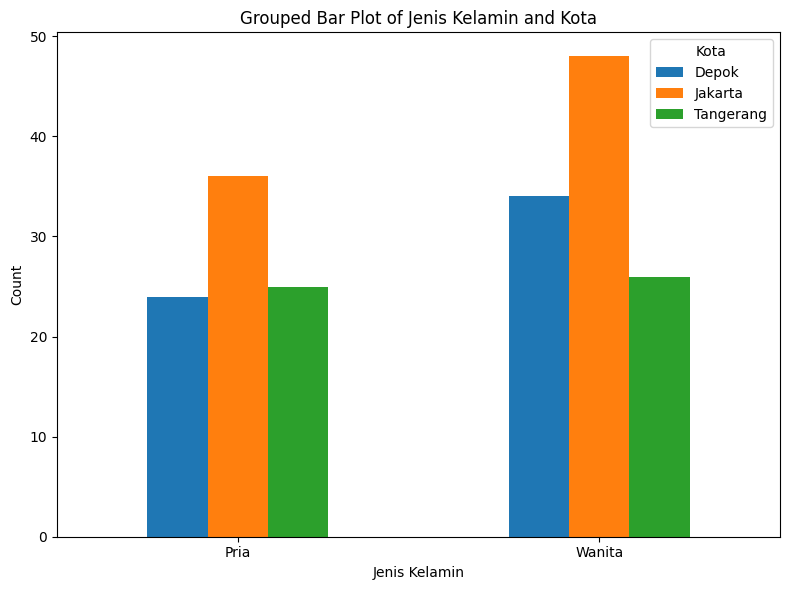

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
counts = df.groupby(["Jenis Kelamin", "Kota"]).size().unstack()

# Create the grouped bar plot using pandas plot function
counts.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Plot of Jenis Kelamin and Kota')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title='Kota')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi di atas didapatkan :
- Pelanggan MixITup cenderung diminati oleh wanita di berbegai kota. Oleh karena itu, MixITup dapat menyesuaikan strategi penjualan dengan menawarkan merchandise menarik sebagai hadiah dengan minimum pembelian tertentu. Strategi ini diharapkan dapat meningkatkan loyalitas pelanggan wanita sekaligus menarik minat pelanggan pria untuk berpartisipasi dan melakukan pembelian.

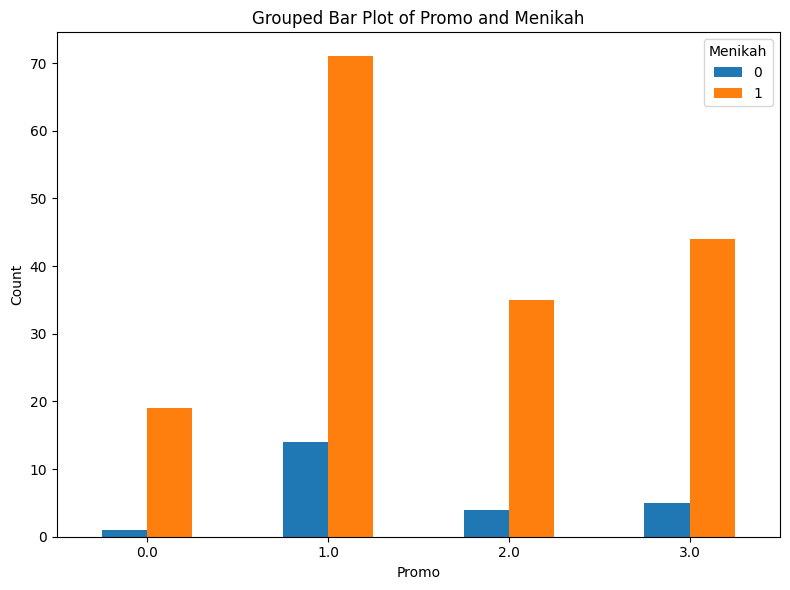

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
counts = df.groupby(["Promo", "Menikah"]).size().unstack()

# Create the grouped bar plot using pandas plot function
counts.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Plot of Promo and Menikah')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title='Menikah')
plt.tight_layout()
plt.show()


Dari grafik di atas dapat disimpulkan :

Pelanggan yang sudah menikah mendominasi penggunaan promo. Oleh karena itu, MixITup dapat menerapkan beberapa strategi khusus untuk menarik minat pelanggan single. Misalnya, dengan memberikan voucher tambahan atau hadiah menarik setelah pelanggan menggunakan promo sebanyak tiga kali berturut-turut. Selain itu, MixITup juga bisa menawarkan diskon khusus keluarga untuk pelanggan yang sudah menikah, guna meningkatkan loyalitas dan mendorong pembelian lebih lanjut.

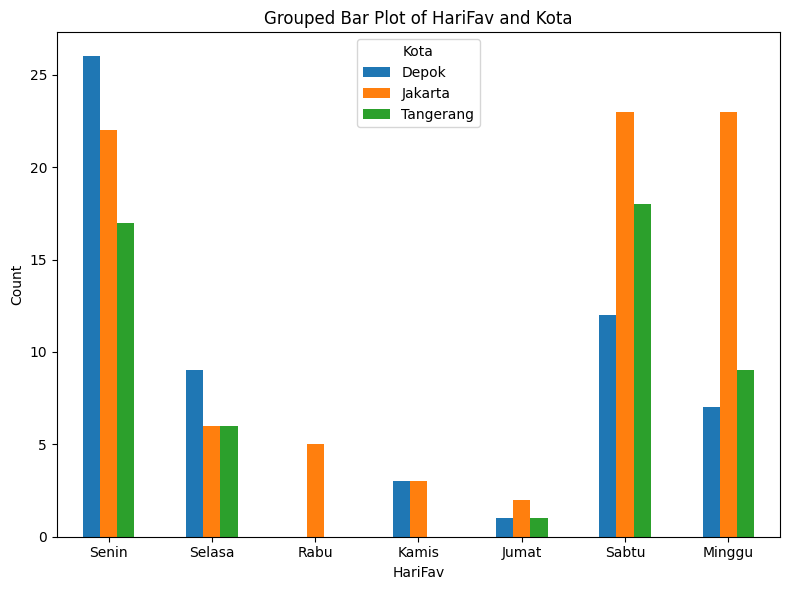

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh urutan hari yang diinginkan
hari_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Asumsikan 'df' adalah DataFrame Anda
# Mengubah 'HariFav' menjadi tipe kategorik dengan urutan yang diinginkan
df['HariFav'] = pd.Categorical(df['HariFav'], categories=hari_order, ordered=True)

# Mengelompokkan data berdasarkan HariFav dan Kota
counts = df.groupby(["HariFav", "Kota"]).size().unstack()

# Membuat plot batang terkelompok
counts.plot(kind='bar', figsize=(8, 6))
plt.title('Grouped Bar Plot of HariFav and Kota')
plt.xlabel('HariFav')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels if needed
plt.legend(title='Kota')
plt.tight_layout()

# Menampilkan plot
plt.show()


- Terlihat bahwa kebanyakan pelanggan MixITup cenderung menggunakan kartu loyality programnya di senin. Terlihat juga bahwa di kota Depok dan Tangerang masih sangat minim pelanggan yang menggunakan loyality program. Untuk meningkatkan frekuensi penggunaan kartu loyality program,  mixITup bisa memberikan promo khusus bagi pelanggan yang menggunakan loyality programnya. Fokuskan untuk menyebar iklan mengenai promo ini di kota Depok dan Tangerang untuk bisa meningkatkan penggunaan loyality program di kota tersebut.

# Standarisasi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         193 non-null    category
 1   Umur                  193 non-null    int64   
 2   Pendapatan-per-bulan  193 non-null    int64   
 3   skor-pengeluaran      193 non-null    int64   
 4   Menikah               193 non-null    category
 5   Kota                  193 non-null    category
 6   Promo                 193 non-null    category
 7   HariFav               193 non-null    category
 8   FavFlavor             193 non-null    category
dtypes: category(6), int64(3)
memory usage: 8.4 KB


In [ ]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[numerical].describe().round(0))

# Standarisasi
df_std = StandardScaler().fit_transform(df[numerical])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[numerical].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  193.0                 193.0             193.0
mean    37.0            18773889.0              50.0
std     12.0            10826203.0              26.0
min     18.0                   0.0               1.0
25%     29.0            11065573.0              35.0
50%     36.0            19262295.0              50.0
75%     47.0            25819672.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.988172             -0.524085          0.058616
1 -0.459882              1.373634          1.371368
2  1.158531             -0.258405         -0.366098
3 -1.567216             -0.562040          0.174447
4  0.051196              0.121139         -0.327488

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  193.0                 193.0             193.0
mean     0.0         

In [ ]:
!pip install kmodes
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes # This line should work after installing the package
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
categoricalnew = ['Jenis Kelamin', 'Menikah']

In [ ]:
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8


In [ ]:
# Membuat salinan data frame
df_encode = df[categoricalnew].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in categoricalnew:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())
# wanita = 1

   Jenis Kelamin  Menikah
0              1        1
1              1        1
2              0        1
3              0        0
4              1        1


In [ ]:
df_onehot = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_onehot.head())

   Jenis Kelamin  Menikah      Umur  Pendapatan-per-bulan  skor-pengeluaran
0              1        1  0.988172             -0.524085          0.058616
1              1        1 -0.459882              1.373634          1.371368
2              0        1  1.158531             -0.258405         -0.366098
3              0        0 -1.567216             -0.562040          0.174447
4              1        1  0.051196              0.121139         -0.327488


In [ ]:
df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         193 non-null    int64  
 1   Menikah               193 non-null    int64  
 2   Umur                  193 non-null    float64
 3   Pendapatan-per-bulan  193 non-null    float64
 4   skor-pengeluaran      193 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 9.0 KB


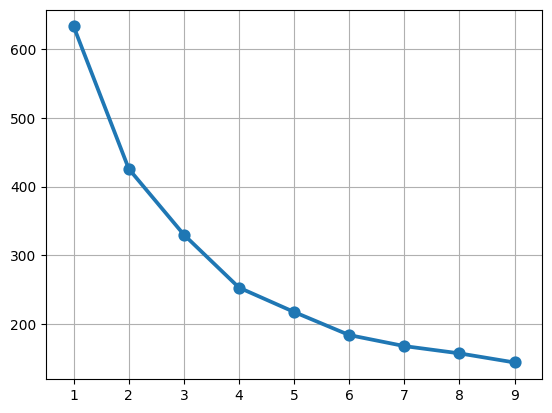

In [ ]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(df_onehot, categorical = list(range(0,2)))
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

#### KMPP STANDAR 3

array([3, 0, 3, 0, 3, 0, 0, 0, 0, 0], dtype=int32)

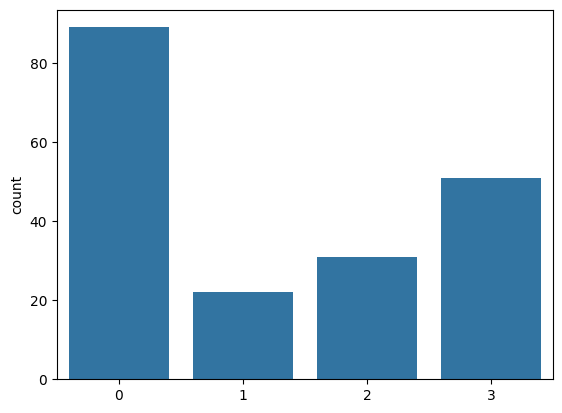

In [ ]:
from sklearn import cluster
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state=24)
kmPP.fit(df_std)
C_kmpp1 = kmPP.predict(df_std)
sns.countplot(x=C_kmpp1)
C_kmpp1[:10]

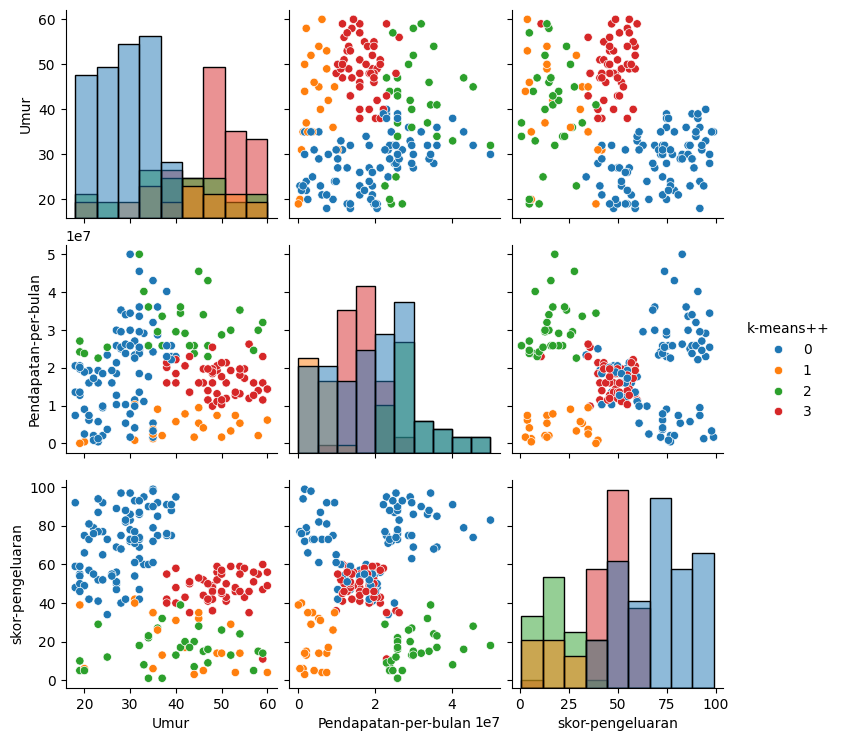

In [ ]:
df_final123 = df.copy()
df_final123['k-means++'] = C_kmpp1
g = sns.pairplot(df_final123, \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [ ]:
df_final123['k-means++'].value_counts()

,count
k-means++,
0,89
3,51
2,31
1,22


array([1, 0, 1, 2, 1, 0, 2, 2, 2, 2], dtype=int32)

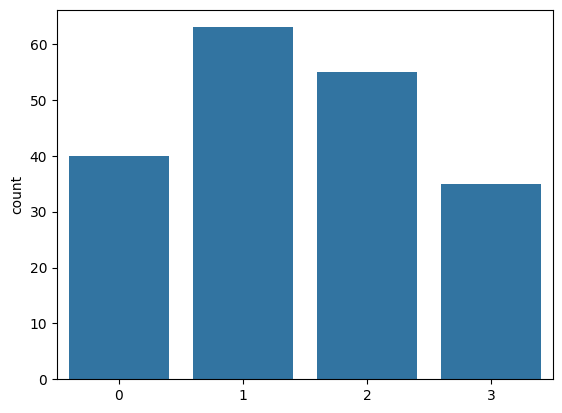

In [ ]:
from sklearn import cluster
k=4
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', random_state=24)
kmPP.fit(df_onehot)
C_kmpp = kmPP.predict(df_onehot)
sns.countplot(x=C_kmpp)
C_kmpp[:10]

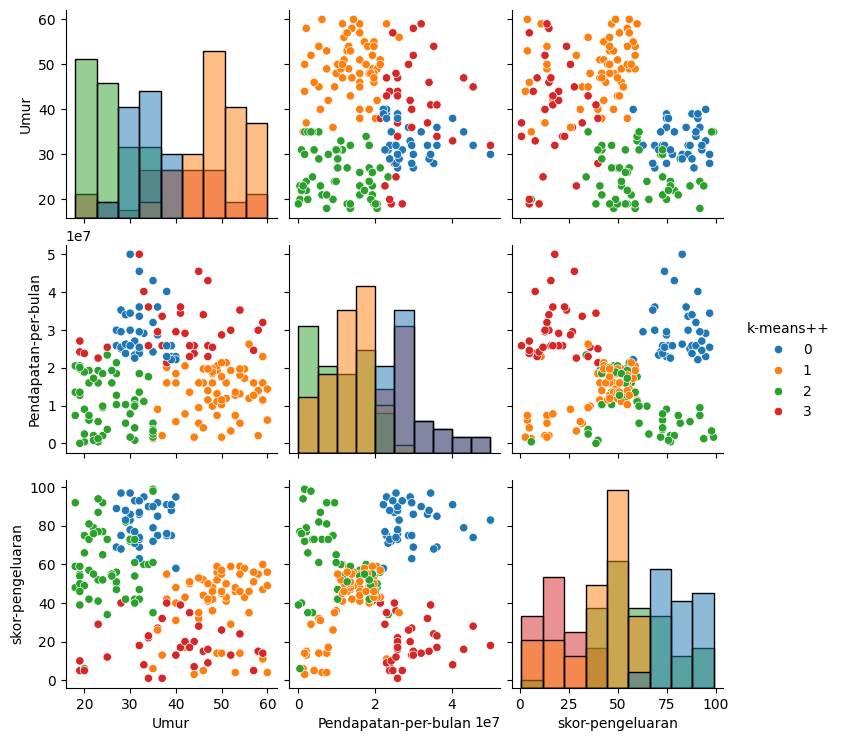

In [ ]:
df_finalKmpp = df.copy()
df_finalKmpp['k-means++'] = C_kmpp
g = sns.pairplot(df_finalKmpp, \
                 hue="k-means++", diag_kind="hist", palette="tab10")

In [ ]:
df_finalKmpp['k-means++'].value_counts()

,count
k-means++,
1,63
2,55
0,40
3,35


In [ ]:
# 4. Evaluasi
silhouette_avg = silhouette_score(df_onehot, df_finalKmpp['k-means++'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.34024931916688667


In [ ]:
for i in range(0,4):
  print(f"\ncluster{i}\n")
  print(df_finalKmpp[df_finalKmpp["k-means++"]==i].describe(include="all"))


cluster0

       Jenis Kelamin       Umur  Pendapatan-per-bulan  skor-pengeluaran  \
count             40  40.000000          4.000000e+01         40.000000   
unique             2        NaN                   NaN               NaN   
top           Wanita        NaN                   NaN               NaN   
freq              22        NaN                   NaN               NaN   
mean             NaN  32.875000          2.913934e+07         81.525000   
std              NaN   3.857643          6.696326e+06          9.999968   
min              NaN  27.000000          2.213115e+07         58.000000   
25%              NaN  30.000000          2.448770e+07         74.000000   
50%              NaN  32.000000          2.602459e+07         83.000000   
75%              NaN  36.000000          3.237705e+07         90.000000   
max              NaN  40.000000          5.000000e+07         97.000000   

       Menikah   Kota  Promo HariFav  FavFlavor  k-means++  
count       40     40   40.

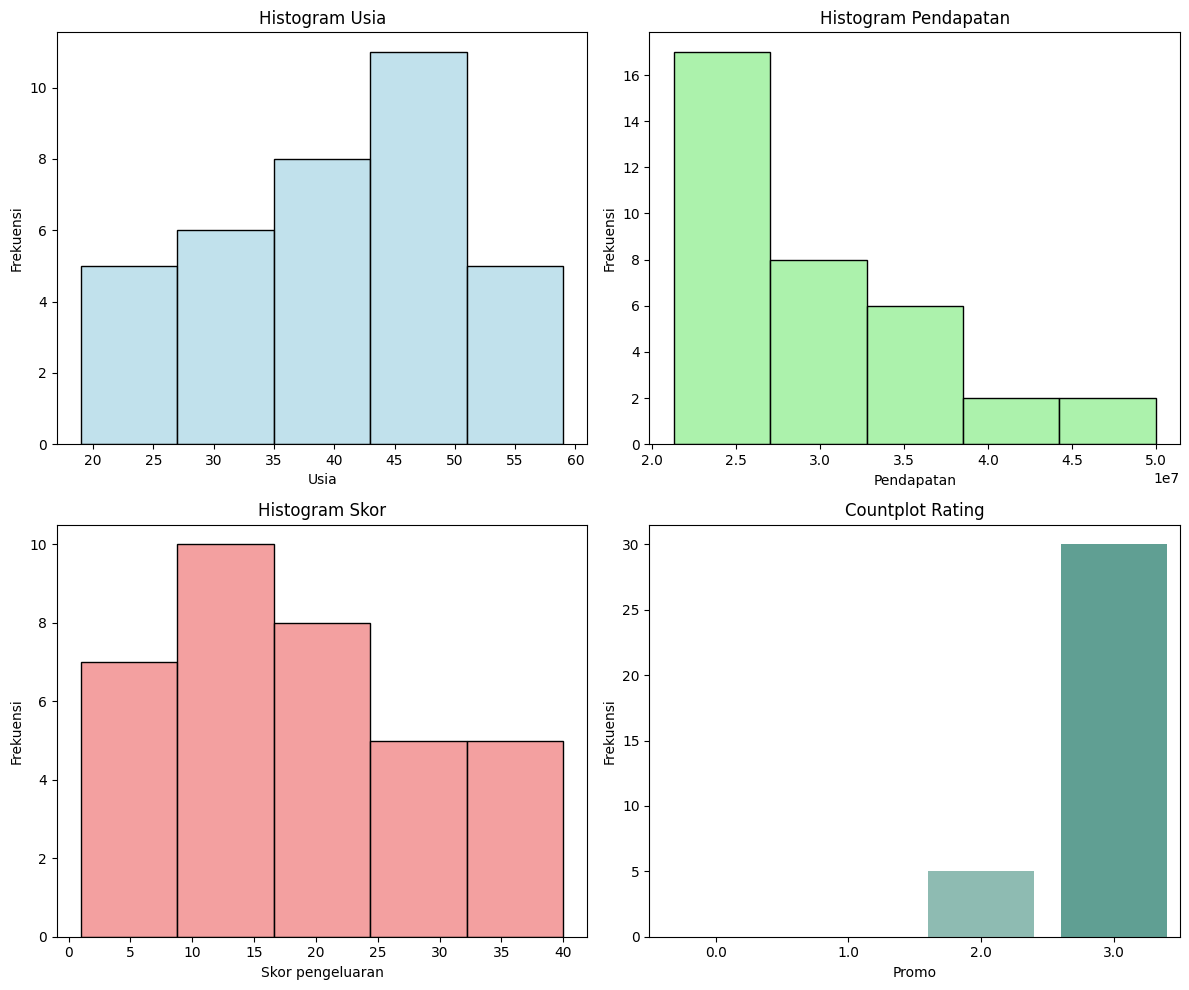

In [ ]:
#cluster 3
dfclus3 = df_finalKmpp[df_finalKmpp["k-means++"]==3]
usia = dfclus3["Umur"]
pendapatan = dfclus3["Pendapatan-per-bulan"]
skor = dfclus3["skor-pengeluaran"]
rating = dfclus3["Promo"]

# Set up the figure for histograms and countplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Adjust layout
plt.tight_layout()
plt.show()

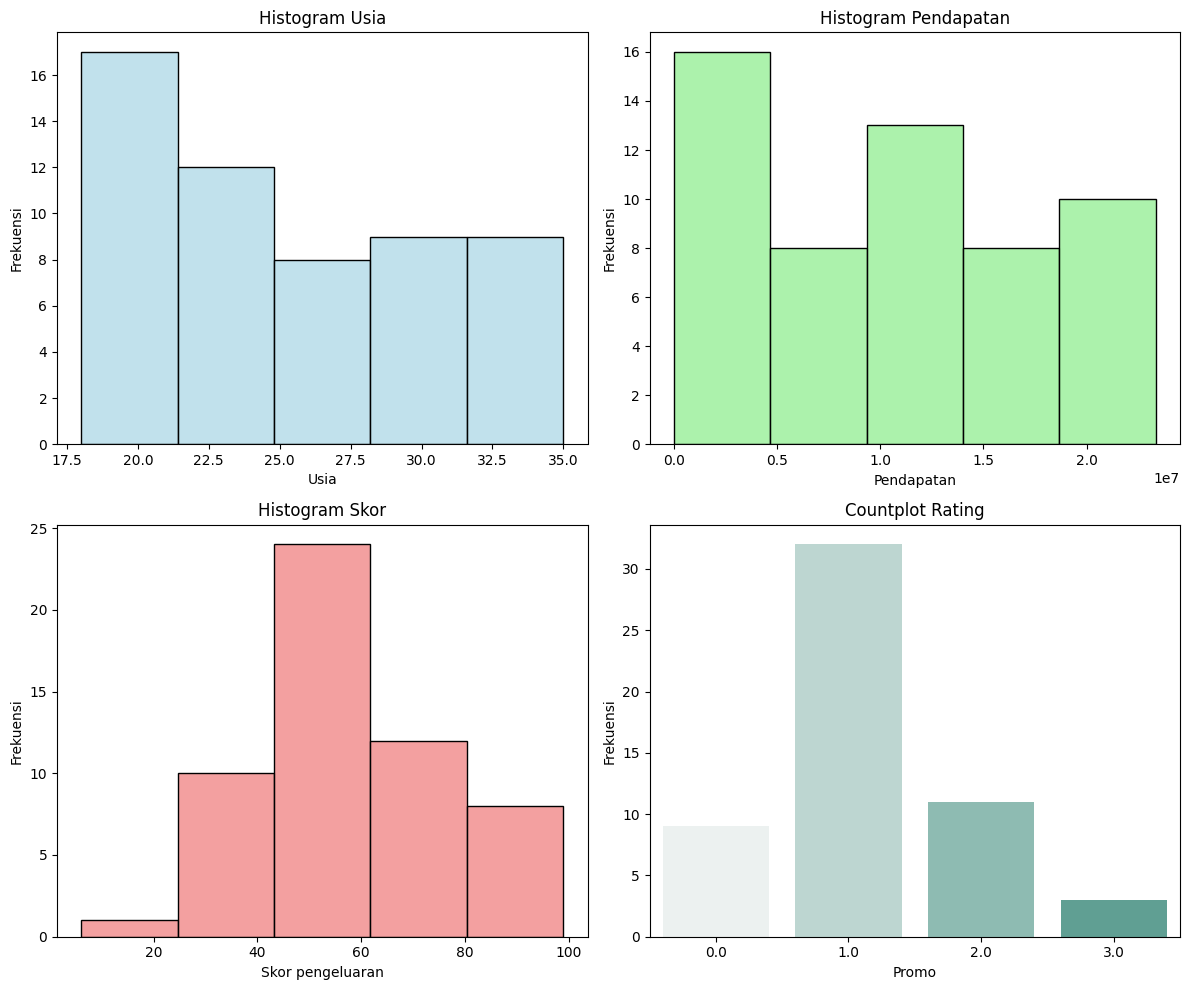

In [ ]:
#cluster 2
dfclus2 = df_finalKmpp[df_finalKmpp["k-means++"]==2]
usia = dfclus2["Umur"]
pendapatan = dfclus2["Pendapatan-per-bulan"]
skor = dfclus2["skor-pengeluaran"]
rating = dfclus2["Promo"]

# Set up the figure for histograms and countplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Adjust layout
plt.tight_layout()
plt.show()

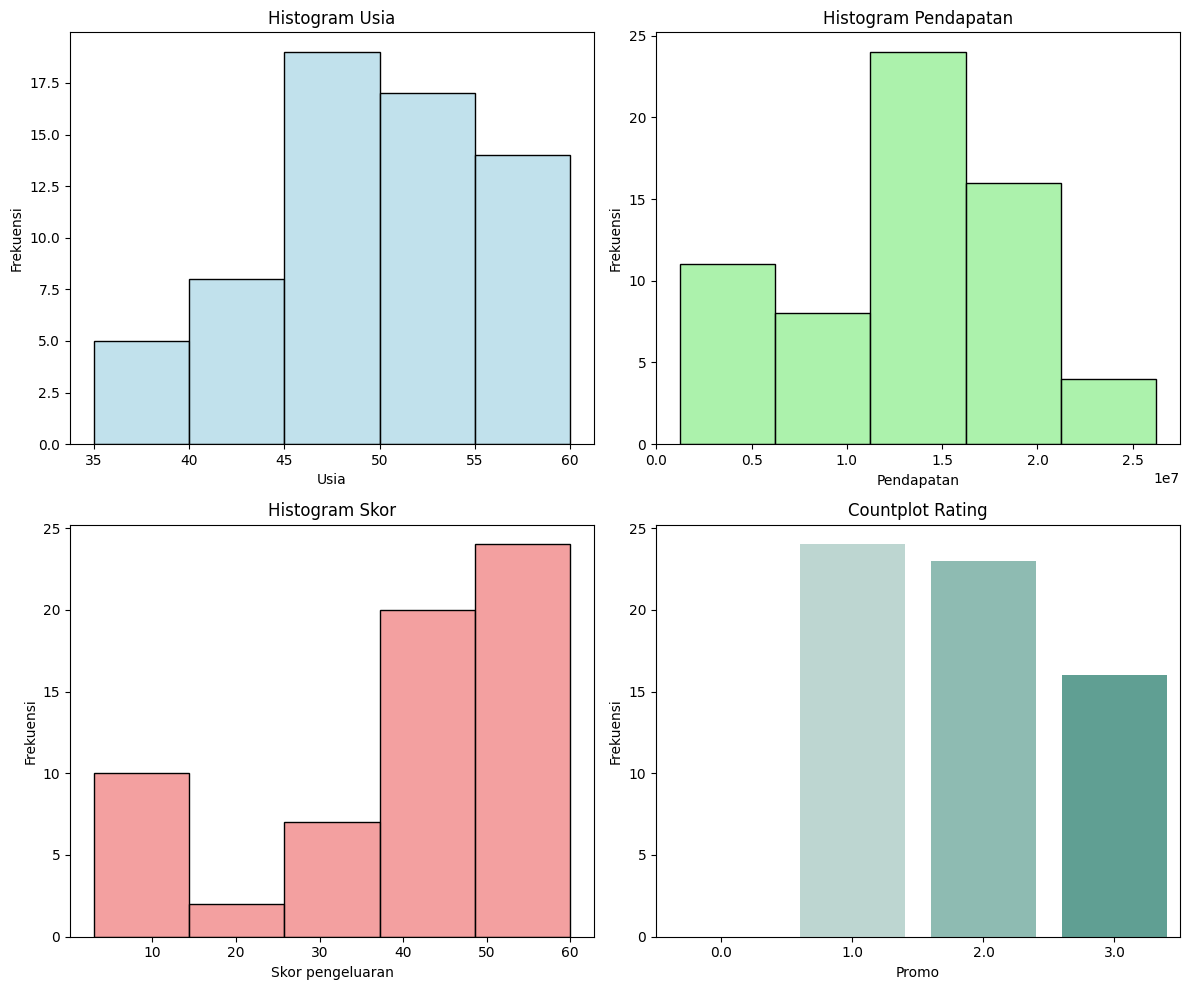

In [ ]:
#cluster 1
dfclus1 = df_finalKmpp[df_finalKmpp["k-means++"]==1]
usia = dfclus1["Umur"]
pendapatan = dfclus1["Pendapatan-per-bulan"]
skor = dfclus1["skor-pengeluaran"]
rating = dfclus1["Promo"]

# Set up the figure for histograms and countplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Adjust layout
plt.tight_layout()
plt.show()

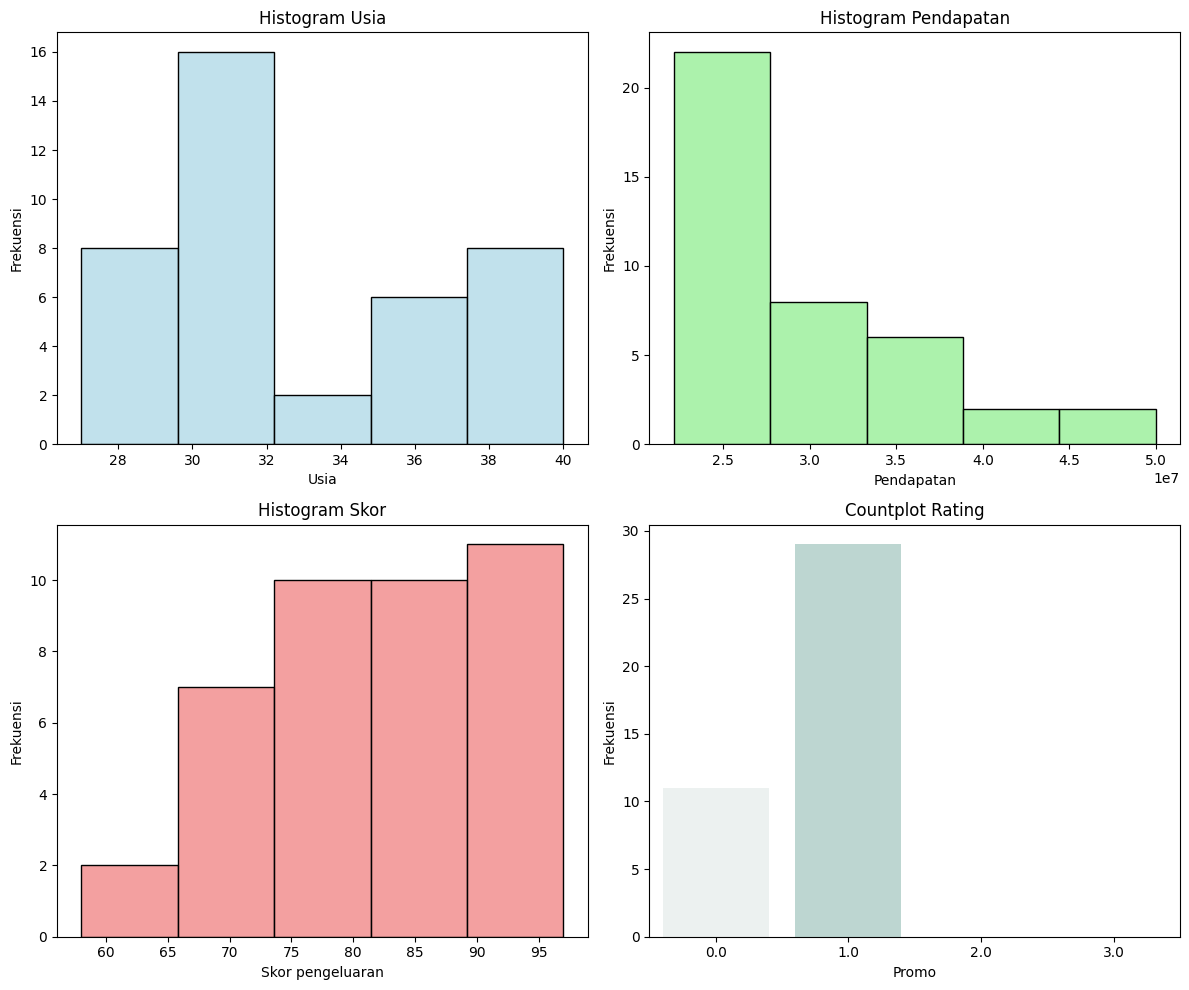

In [ ]:
#cluster 0
dfclus0 = df_finalKmpp[df_finalKmpp["k-means++"]==0]
usia = dfclus0["Umur"]
pendapatan = dfclus0["Pendapatan-per-bulan"]
skor = dfclus0["skor-pengeluaran"]
rating = dfclus0["Promo"]

# Set up the figure for histograms and countplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for Usia
sns.histplot(usia, bins=5, kde=False, ax=axs[0, 0], color='lightblue')
axs[0, 0].set_title('Histogram Usia')
axs[0, 0].set_xlabel('Usia')
axs[0, 0].set_ylabel('Frekuensi')

# Histogram for Pendapatan
sns.histplot(pendapatan, bins=5, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Histogram Pendapatan')
axs[0, 1].set_xlabel('Pendapatan')
axs[0, 1].set_ylabel('Frekuensi')

# Histogram for Skor
sns.histplot(skor, bins=5, kde=False, ax=axs[1, 0], color='lightcoral')
axs[1, 0].set_title('Histogram Skor')
axs[1, 0].set_xlabel('Skor pengeluaran')
axs[1, 0].set_ylabel('Frekuensi')

# Countplot for Rating
sns.countplot(x=rating, ax=axs[1, 1], palette='light:#5A9')
axs[1, 1].set_title('Countplot Rating')
axs[1, 1].set_xlabel('Promo')
axs[1, 1].set_ylabel('Frekuensi')

# Adjust layout
plt.tight_layout()
plt.show()

**Deskripsi Karakteristik Setiap Cluster (Segmentasi Customer)**

**Cluster 0**  
Cluster ini didominasi oleh wanita, dengan rata-rata usia 32 tahun. Rentang usia dalam cluster ini berkisar antara 27 hingga 40 tahun, dan seluruh anggotanya sudah menikah. Sebagian besar pelanggan berasal dari Depok, yang menegaskan bahwa cluster ini mungkin mencerminkan gaya hidup urban dan keluarga muda di wilayah tersebut.

Dari sisi ekonomi, rata-rata pendapatan bulanan mereka mencapai Rp29 juta, dengan beberapa anggota berpenghasilan hingga Rp50 juta per bulan. Pengeluaran mereka pun cenderung besar, dengan skor rata-rata 81,5 dari maksimum 97, menunjukkan bahwa mereka tidak ragu untuk melakukan pembelanjaan yang signifikan. Cluster ini menunjukkan preferensi yang kuat untuk berbelanja di awal minggu, terutama pada hari Senin, dan mereka jarang memanfaatkan promo yang tersedia. Walaupun tidak ada rasa es krim favorit yang dominan, mereka tampak menyukai berbagai variasi rasa.  

Secara keseluruhan, cluster ini mencerminkan kelompok konsumen dengan gaya hidup konsumtif dan kemampuan ekonomi tinggi, yang lebih aktif saat weekdays. Strategi penjualan yang efektif untuk mereka dapat berupa promo bundling atau diskon eksklusif untuk produk premium, terutama dengan fokus pada hari kerja.

---
**Cluster 1**  
Pelanggan dalam cluster ini rata-rata berusia 49 tahun, dengan rentang usia antara 35 hingga 60 tahun. Sama seperti cluster sebelumnya, mayoritas pelanggan berjenis kelamin wanita dan sudah menikah. Mereka sebagian besar berdomisili di Jakarta, yang mencerminkan bahwa cluster ini mungkin terdiri dari konsumen dewasa dengan gaya hidup mapan di kota besar.

Namun, dari sisi ekonomi, pendapatan rata-rata mereka lebih rendah, yaitu sekitar Rp13,3 juta per bulan, meskipun ada juga yang berpenghasilan hingga Rp26 juta. Skor pengeluaran mereka berada di kisaran menengah ke bawah, dengan rata-rata 40 dari maksimum 60. Hal ini menunjukkan bahwa mereka lebih selektif dalam melakukan pembelanjaan. Cluster ini menunjukkan kecenderungan berbelanja pada akhir pekan, terutama hari Sabtu, yang mungkin terkait dengan waktu luang dan aktivitas keluarga. Mereka juga cenderung tertarik pada promo, tetapi lebih memilih promo yang relevan dan menarik.

Cluster ini mencerminkan kelompok konsumen dewasa yang selektif dan cenderung berbelanja saat akhir pekan. Strategi penjualan yang tepat untuk mereka bisa berupa promo akhir pekan atau program loyalitas yang menawarkan diskon khusus bagi pelanggan setia dan keluarga.

---

**Cluster 2**  
Cluster ini didominasi oleh pelanggan wanita berusia muda, dengan rata-rata usia 25 tahun dan rentang usia antara 18 hingga 35 tahun. Mereka sebagian besar tinggal di Jakarta, dan dalam cluster ini terdapat kombinasi pelanggan yang sudah menikah dan belum menikah.

Pendapatan bulanan rata-rata mereka berada di angka Rp10,4 juta, namun ada variasi yang cukup signifikan, mulai dari Rp0 hingga Rp23 juta. Skor pengeluaran mereka berada di tingkat menengah, dengan rata-rata 59 dari maksimum 99, menunjukkan bahwa mereka memiliki kebiasaan konsumsi yang bervariasi. Cluster ini memiliki kecenderungan kuat untuk berbelanja di awal minggu, terutama hari Senin, dan mereka cukup aktif dalam memanfaatkan promo yang tersedia. Sama seperti cluster lainnya, mereka tidak memiliki preferensi khusus terhadap rasa es krim, tetapi cenderung menyukai rasa-rasa yang unik dan variatif.

Cluster ini mencerminkan kelompok konsumen muda yang aktif secara sosial dan cenderung berbelanja saat weekdays. Kampanye pemasaran yang efektif untuk mereka dapat berupa flash sale atau promo unik di hari Senin, serta produk-produk edisi terbatas yang dapat menarik perhatian konsumen muda yang suka mencoba hal baru.

---
**Cluster 3**  
Cluster ini mayoritas terdiri dari pelanggan pria dengan usia rata-rata 39 tahun, dan rentang usia antara 19 hingga 59 tahun. Sebagian besar dari mereka sudah menikah dan berdomisili di Tangerang, mencerminkan konsumen dengan kehidupan suburban yang stabil.

Pendapatan bulanan rata-rata dalam cluster ini mencapai Rp29,7 juta, dengan kisaran antara Rp21 juta hingga Rp50 juta. Namun, meskipun berpenghasilan tinggi, skor pengeluaran mereka cukup rendah, yaitu 18,8 dari maksimum 40,serta sangat sering menggunakan promo, menunjukkan bahwa mereka lebih berhati-hati dalam melakukan pembelanjaan. Mereka cenderung berbelanja di awal minggu, terutama hari Senin, dan menunjukkan preferensi pada rasa-rasa es krim yang sederhana atau klasik. Promo juga menarik minat mereka, namun tidak sebanyak cluster lainnya.

Cluster ini mencerminkan kelompok pria dengan kehidupan yang teratur dan lebih berhati-hati dalam mengatur pengeluaran. Strategi pemasaran yang tepat untuk mereka adalah menawarkan produk yang praktis dan simpel, serta promo yang relevan untuk keluarga. Selain itu, kampanye yang difokuskan pada hari kerja, seperti “Promo untuk Ayah” atau diskon praktis, dapat menjadi daya tarik tambahan bagi cluster ini.

---

**Kesimpulan**  
Dengan memahami karakteristik setiap cluster, strategi penjualan dan pemasaran dapat disesuaikan untuk memaksimalkan efektivitasnya. **Cluster 0 dan 1** lebih aktif saat akhir pekan, sehingga promo atau flash sale pada hari kerja dapat menjadi strategi yang efektif. **Cluster 2 dan 3** cenderung berbelanja di awal pekan, sehingga promo akhir pekan atau program loyalitas akan lebih relevan bagi mereka. akan tetapi perlu dipertimbangkan juga pada semua **Cluster** untuk pendekatan yang lebih sederhana dan praktis, dengan fokus pada kenyamanan dan promo keluarga.

Dengan pendekatan yang personal dan segmentasi yang tepat, bisnis dapat meningkatkan kepuasan pelanggan dan memperkuat loyalitas mereka.

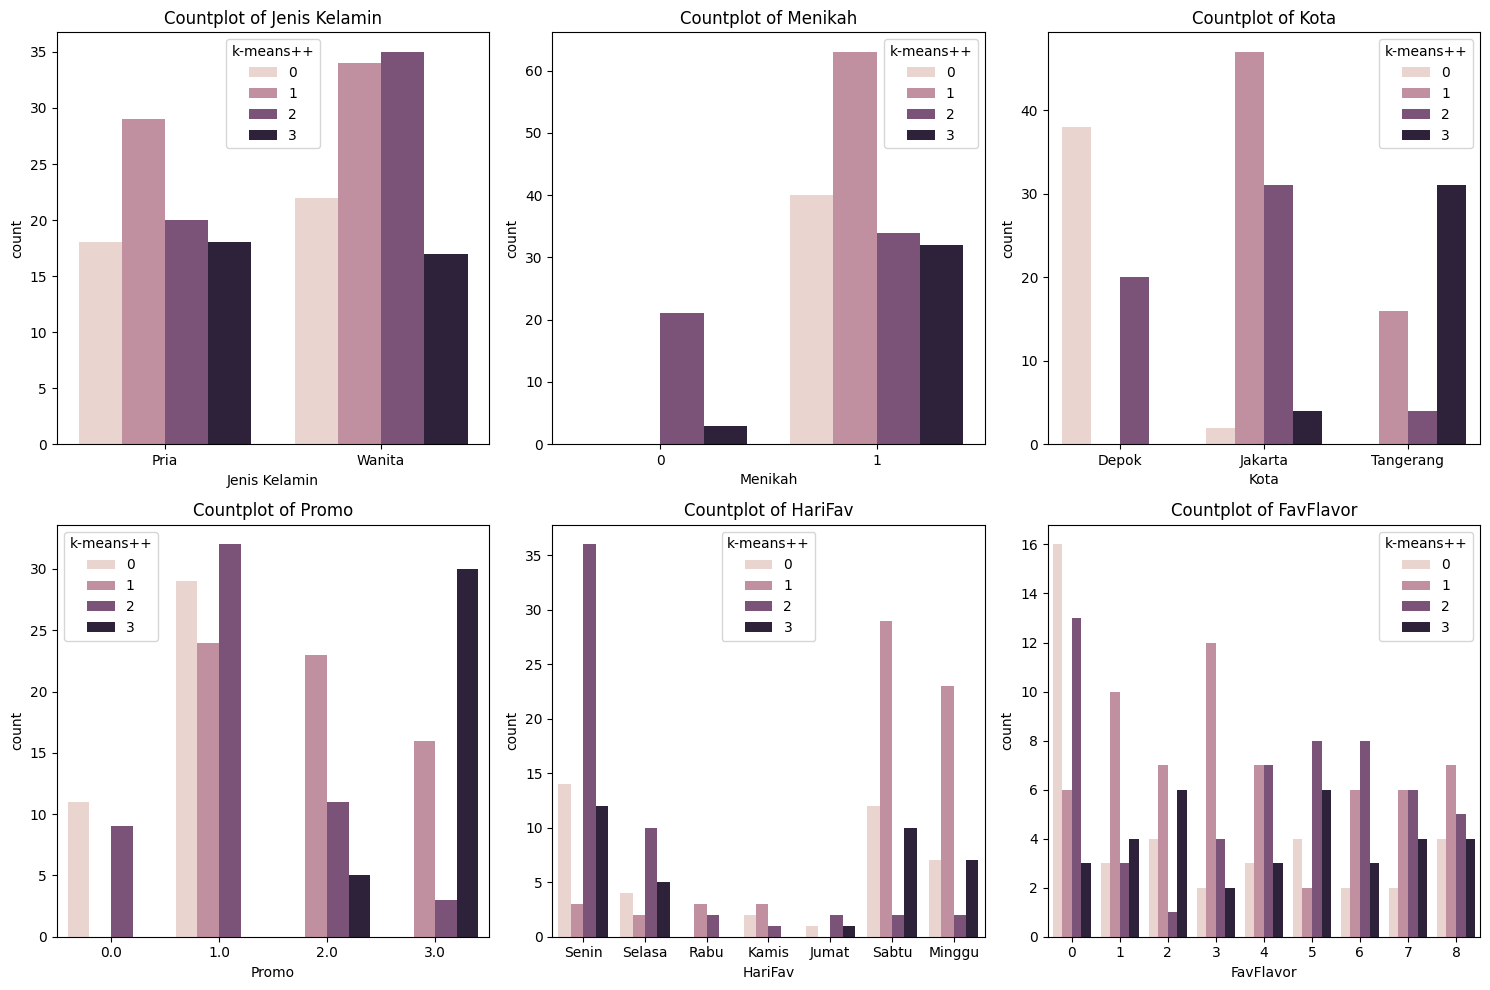

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

# Plot each categorical column in a separate subplot
for i, column in enumerate(['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']):
    sns.countplot(data=df_finalKmpp, x=column, ax=ax[i], hue='k-means++')
    ax[i].set_title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

**Cluster 0:**
- Buat **program loyalty jangka panjang** dengan insentif peningkatan skor-pengeluaran secara bertahap.
- Berikan **promo eksklusif berdasarkan aktivitas bulanan** untuk mendorong partisipasi mereka.
- Pasarkan produk dengan **kemasan premium**, karena pelanggan ini cenderung tinggi terhadap pengeluaran.

**Cluster 1:**
- Tawarkan **promo akhir pekan** dengan bonus spesial pada hari Jumat.
- Berikan akses **early access ke promo spesial** untuk pelanggan setia ini.
- Fokus pada **produk bundling premium** dengan rasa favorit seperti coklat vanila.

**Cluster 2:**
- **Promo akhir pekan** dengan diskon besar atau voucher cashback sangat cocok.
- Berikan **reward eksklusif** bagi pelanggan yang sering menggunakan promo.
- Fokuskan pemasaran di **pusat perbelanjaan di Tangerang** atau lakukan aktivasi event lokal.

**Cluster 3:**
- Ciptakan **promo kreatif di hari Minggu** seperti "Happy Sunday Deals."
- Berikan promo **limited edition dengan rasa eksklusif** untuk menarik minat klaster ini.
- Manfaatkan **media sosial dan konten interaktif** untuk mempromosikan rasa-rasa eksperimental.

**Kesimpulan dan Rekomendasi Umum**
- **Targetkan promosi berdasarkan pola belanja harian**: Senin untuk klaster 0, Jumat untuk klaster 1, Sabtu untuk klaster 2, dan Minggu untuk klaster 3.
- **Diversifikasi penawaran promo** untuk memenuhi kebutuhan dan preferensi setiap segmen.
- **Aktivasi event lokal dan kolaborasi** di kota-kota utama seperti Jakarta, Tangerang, dan Depok untuk meningkatkan engagement.
- Gunakan strategi **personalized marketing** berdasarkan skor-pengeluaran dan frekuensi penggunaan promo.
